In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Initialize dataframes
df1 = pd.read_csv('data/round1/trades_round_1_day_-2_nn.csv', delimiter=';')
df2 = pd.read_csv('data/round1/trades_round_1_day_-1_nn.csv', delimiter=';')
df3 = pd.read_csv('data/round1/trades_round_1_day_0_nn.csv', delimiter=';')

# Concatenate DataFrames vertically
combined_df = pd.concat([df1, df2, df3], ignore_index=True)
prices = combined_df[['symbol', 'price']]

In [4]:
amethyst_df = prices[prices['symbol'] == 'AMETHYSTS']
starfruit_df = prices[prices['symbol'] == 'STARFRUIT']

In [5]:
# Calculate the 1st and 3rd quartiles of the 'price' column in amethyst_df
amethyst_q1 = amethyst_df['price'].quantile(0.25)
amethyst_q3 = amethyst_df['price'].quantile(0.75)

# Calculate the 1st and 3rd quartiles of the 'price' column in starfruit_df
starfruit_q1 = starfruit_df['price'].quantile(0.25)
starfruit_q3 = starfruit_df['price'].quantile(0.75)

print(f"Amethyst 1st Quartile: {amethyst_q1}, 3rd Quartile: {amethyst_q3}")
print(f"Starfruit 1st Quartile: {starfruit_q1}, 3rd Quartile: {starfruit_q3}")

Amethyst 1st Quartile: 9998.0, 3rd Quartile: 10002.0
Starfruit 1st Quartile: 5026.0, 3rd Quartile: 5058.0


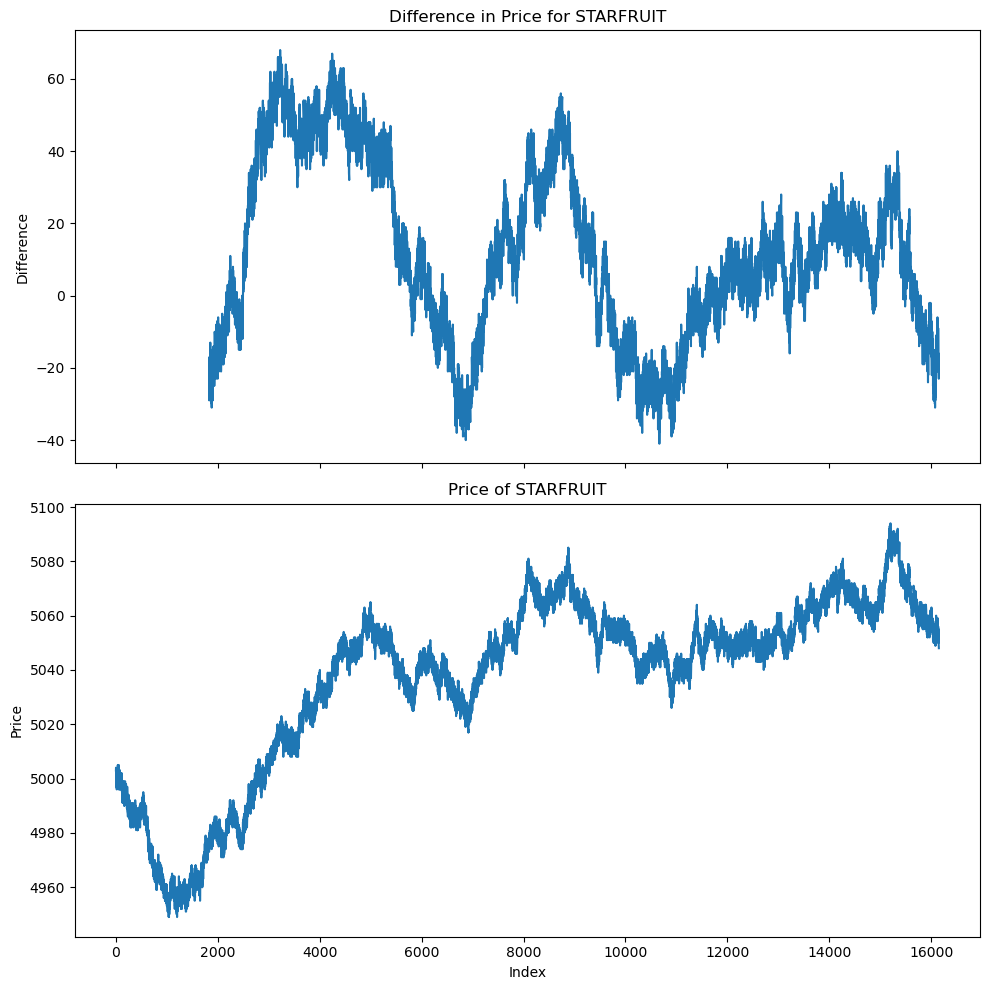

In [16]:
import matplotlib.pyplot as plt

# Calculate the difference (rate of change) of prices
starfruit_diff = starfruit_df['price'].diff()

# Calculate the rolling sum of differences (aggregated rate of change)
starfruit_diff_agg = starfruit_diff.rolling(1000).sum()

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot the aggregated difference on the first subplot (ax1)
ax1.plot(starfruit_diff_agg)
ax1.set_title('Difference in Price for STARFRUIT')
ax1.set_ylabel('Difference')

# Plot the original price on the second subplot (ax2)
ax2.plot(starfruit_df['price'])
ax2.set_title('Price of STARFRUIT')
ax2.set_ylabel('Price')
ax2.set_xlabel('Index')

plt.tight_layout()  # Adjust layout to prevent overlapping labels

plt.show()